# 3-Classification-Sosyal Medya Reklamlarında Ürün Satın Alımı

<img src="socialmedia.jpg">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings 
warnings.simplefilter("ignore")

Sosyal medya reklamlarının sınıflandırılması, pazarlama alanında veri bilimi uygulamalarının önemli bir örneğidir. Bu tür bir projeyi başarıyla gerçekleştirmek için aşağıdaki adımları izleyebiliriz:

1. **Veri Ön İşleme ve İnceleme:** Verilerinizi temizleyin ve düzenleyin. Eksik verileri doldurun, gereksiz sütunları kaldırın ve verileri modelinizin işleyebileceği bir formata dönüştürün.

3. **Özellik Mühendisliği(Feature Engineering):** Verilerinizi daha anlamlı hale getirmek için özellik mühendisliği yapın. Özelliklerinizi seçin veya oluşturun ve hedef kitlenizi sınıflandırmak için en iyi tahminleyicileri belirleyin.

4. **Veri Keşfi ve Görselleştirme:** Verilerinizi keşfedin ve görselleştirin. Hangi faktörlerin hedef kitlenizin davranışını etkilediğini daha iyi anlamak için grafikler ve görselleştirmeler kullanın.

5. **Veri Bölme:** Verilerinizi eğitim ve test verisi olarak bölün. Eğitim verileriyle modelinizi eğitin ve test verileriyle performansını değerlendirin.

6. **Model Seçimi:** Verilerinizin özelliklerine ve problem yapısına bağlı olarak uygun bir sınıflandırma modeli seçin. Örnek olarak, Karar Ağaçları, Destek Vektör Makineleri (SVM), Rastgele Ormanlar veya Derin Öğrenme modelleri kullanılabilir.

7. **Model Eğitimi:** Seçtiğiniz modeli eğitin. Modelinizi eğitirken hiperparametre ayarlaması yapmayı unutmayın.

8. **Model Değerlendirmesi:** Modelinizi test verileriyle değerlendirin. Sınıflandırma performansınızı ölçmek için hassasiyet, geri çağırma, F1 puanı ve AUC ROC gibi metrikleri kullanabilirsiniz.

9. **Sonuçların İncelemesi ve Yorumlama:** Modelinizi ve sonuçları inceleyin. Hangi faktörlerin hedef kitlenizi etkilediğini daha iyi anlamak için modelin önemli özelliklerini analiz edin.

10. **Sonuçların Uygulanması:** Elde ettiğiniz sonuçları kullanarak reklam kampanyalarınızı optimize edin. Hangi tür reklamların, hangi hedef kitleye daha iyi performans gösterdiğini belirleyin ve bu bilgileri gelecekteki kampanyalarınıza uygulayın.

Bu adımları takip ederek, sosyal medya reklamlarının sınıflandırılması için bir veri bilimi projesini başarılı bir şekilde gerçekleştirebilirsiniz. Bu projenin başarısı, daha iyi hedefleme ve pazarlama stratejileri geliştirmenize yardımcı olabilir.

## Veri Ön İşleme ve İnceleme:

In [2]:
df=pd.read_csv("social.csv")

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Bu veri seti, müşterilerin yaş, tahmini gelir ve bir ürünü satın alma durumuyla ilgili bilgileri içeriyor gibi görünüyor. Her bir satır, bir müşteriyi temsil eder ve bu müşterilerin belirli bir ürünü satın alıp almadığına dair bir etiket içerir. İşte veri setinin özelliklerinin açıklamaları:

1. **Age (Yaş):** Müşterinin yaşını temsil eder. Örneğin, ilk satırda müşteri 19 yaşındadır.

2. **EstimatedSalary (Tahmini Gelir):** Müşterinin tahmini gelirini temsil eder. Örneğin, ilk satırda müşterinin tahmini geliri 19.000 birimdir.

3. **Purchased (Satın Alma Durumu):** Bu, müşterinin belirli bir ürünü satın alıp almadığını gösteren bir etiket veya sınıflandırma değeridir. "0" değeri, müşterinin ürünü satın almadığını, "1" değeri ise müşterinin ürünü satın aldığını gösterir.

Bu tür bir veri seti, özellikle müşterilerin davranışlarını ve ürün satın alma alışkanlıklarını anlamak için kullanılabilir. Veriyi analiz ederek, belirli bir yaş ve tahmini gelir aralığına sahip müşterilerin ürünü satın alma olasılığını değerlendirebilir ve pazarlama stratejilerini buna göre ayarlayabilirsiniz.

In [4]:
df.shape

(400, 3)

In [5]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


## Veri Görselleştirme:

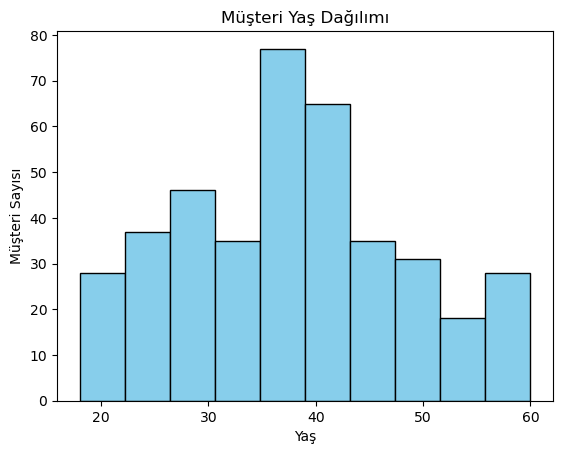

In [10]:
# Yaş dağılımını gösteren histogram
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Yaş')
plt.ylabel('Müşteri Sayısı')
plt.title('Müşteri Yaş Dağılımı')
plt.show()

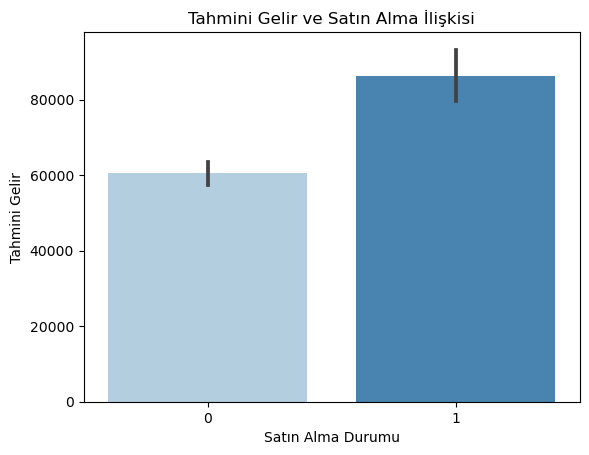

In [11]:
# Tahmini gelir ve satın alma ilişkisini gösteren bir çubuk grafik
sns.barplot(x='Purchased', y='EstimatedSalary', data=df, palette='Blues')
plt.xlabel('Satın Alma Durumu')
plt.ylabel('Tahmini Gelir')
plt.title('Tahmini Gelir ve Satın Alma İlişkisi')
plt.show()

# Modelleme:

In [12]:
def fnc_all_classification_models(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier 
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    from sklearn.model_selection import train_test_split
   
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [15]:
x = df.drop(columns=['Purchased'])  # Bağımsız değişkenler
y = df['Purchased']  # Hedef değişken

In [16]:
fnc_all_classification_models(x,y)

,accuracy_score
GaussianNB,0.9250
XGBClassifier,0.9125
RandomForestClassifier,0.9000
DecisionTreeClassifier,0.8375
KNeighborsClassifier,0.8250
SVC,0.7375
BernoulliNB,0.6500
LogisticRegression,0.6500


In [ ]:
# Veri az olduğu için derin öğrenme yapmıyoruz

## Model Doğrulama:

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Modelleri ve isimlerini bir sözlükte saklayalım
models = {
    "GaussianNB": GaussianNB(),
   
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(),
    
    "LogisticRegression": LogisticRegression()
}

# Her model için çapraz doğrulama sonuçlarını saklamak için bir sözlük oluşturalım
cv_scores = {}

# Tüm modelleri döngü içinde değerlendirelim
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    cv_scores[model_name] = scores

# Her bir model için çapraz doğrulama sonuçlarını görüntüleyelim
for model_name, scores in cv_scores.items():
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()
    print(f"{model_name} Çapraz Doğrulama Sonuçları:")
    print(f"Ortalama Doğruluk: {mean_accuracy:.2f}")
    print(f"Standart Sapma: {std_accuracy:.2f}")
    print("\n")

# En iyi modeli seçmek için doğruluk puanlarını karşılaştırabilirsiniz
best_model_name = max(cv_scores, key=lambda k: cv_scores[k].mean())
best_model_scores = cv_scores[best_model_name]

print(f"En İyi Model: {best_model_name}")
print(f"En İyi Modelin Ortalama Doğruluk Puanı: {best_model_scores.mean():.2f}")

GaussianNB Çapraz Doğrulama Sonuçları:
Ortalama Doğruluk: 0.89
Standart Sapma: 0.06


RandomForestClassifier Çapraz Doğrulama Sonuçları:
Ortalama Doğruluk: 0.86
Standart Sapma: 0.06


DecisionTreeClassifier Çapraz Doğrulama Sonuçları:
Ortalama Doğruluk: 0.80
Standart Sapma: 0.06


KNeighborsClassifier Çapraz Doğrulama Sonuçları:
Ortalama Doğruluk: 0.77
Standart Sapma: 0.07


SVC Çapraz Doğrulama Sonuçları:
Ortalama Doğruluk: 0.77
Standart Sapma: 0.08


LogisticRegression Çapraz Doğrulama Sonuçları:
Ortalama Doğruluk: 0.68
Standart Sapma: 0.07


En İyi Model: GaussianNB
En İyi Modelin Ortalama Doğruluk Puanı: 0.89


## Sonuç:

Bu projeyi tamamladığımızda, farklı sınıflandırma modellerini kullanarak sosyal medya reklamlarını sınıflandırdık ve en iyi performansı gösteren modeli belirledik. Sonuçlar, reklam kampanyalarını daha iyi hedefleme ve pazarlama stratejilerini optimize etme potansiyeline sahip olduğumuzu gösteriyor. Ancak, daha fazla veri toplama, özellik mühendisliği ve model ayarlaması gibi ileri çalışmalarla bu projeyi daha da geliştirmek mümkün. Bu proje, pazarlama alanında veri biliminin gücünü gösteriyor ve daha iyi hedef kitle analizi yapmak için veri bilimini kullanmanın önemini vurguluyor.